# Matplotlib Tutorial
**Sources:**
Corey Schafer [Matplotlib Tutorial](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_) Playlist
- Part 9: Plotting Live Data in Real-Time

In [1]:
import random
import pandas as pd
from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
plt.style.use("seaborn")

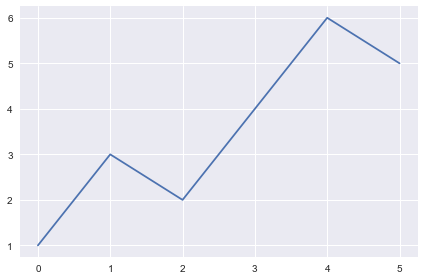

In [3]:
x_vals = [i for i in range(6)]
y_vals = [1, 3, 2 ,4, 6, 5]
plt.plot(x_vals, y_vals)
plt.tight_layout()

### Use `%matplotlib notebook` magic line to run animated matplotlib plots in jupyter notebook
(This line is not working in VScode)



In [4]:
%matplotlib notebook

### Creating an animated line plot using `FuncAnimation` from `matplotlib.animation`
- `FuncAnimation` takes:
- - Figure on which animation takes place
- - Function which plots the graph, takes frame as first parameter
- - interval of each animation (in milliseconds)

In [5]:
x_vals = []
y_vals = []
index = count()     # returns a count object gives values starting from 0

In [6]:
def animate(frame):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))

    plt.plot(x_vals, y_vals)

<IPython.core.display.Javascript object>


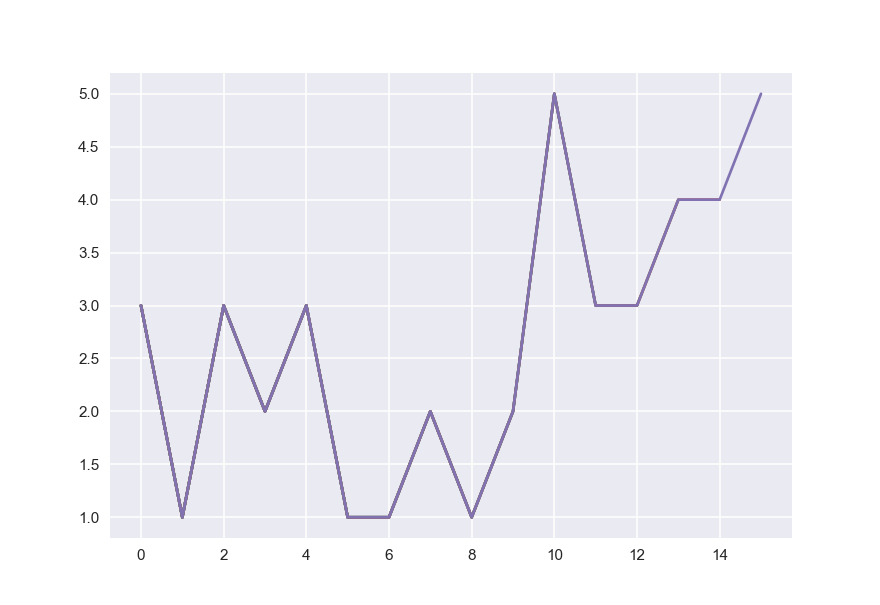

In [7]:
fig = plt.gcf()
anim = FuncAnimation(fig, animate, interval=500)
plt.tight_layout()

- Different colors of lines are being plotted in each frame, because everytime `plt.plot()` is plotting new graph on top of old.
### Use `plt.cla()` before plotting to clear the current axes, so to plot new lines from starting which doesn't change the color too

<IPython.core.display.Javascript object>


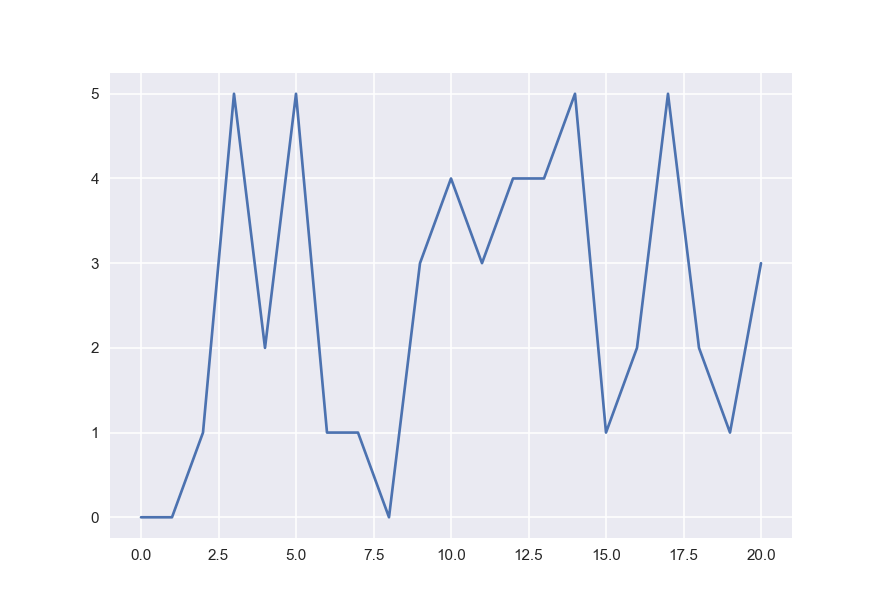

In [8]:
x_vals = []
y_vals = []
index = count()
def animate(frame):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    plt.cla()    # it helps to clear the current axes
    plt.plot(x_vals, y_vals)
fig = plt.gcf()
anim = FuncAnimation(fig, animate, interval=500)
plt.tight_layout()

### Plotting line chart on real time `random_data` CSV file.
- Make sure to run [`data_gen.py`](./data_gen.py) file alongside, it will generate data and in this notebook we are plotting it.

In [13]:
def animated_lineplot(frame):
    data = pd.read_csv("./data/random_data.csv")
    x_data = data["x_value"]
    y1_data = data["total_1"]
    y2_data = data["total_2"]
    
    plt.cla()
    plt.plot(x_data, y1_data, label="Channel 1", c="red")
    plt.plot(x_data, y2_data, label="Channel 2", c="blue")
    plt.legend(loc="upper left")
    plt.tight_layout()

<IPython.core.display.Javascript object>


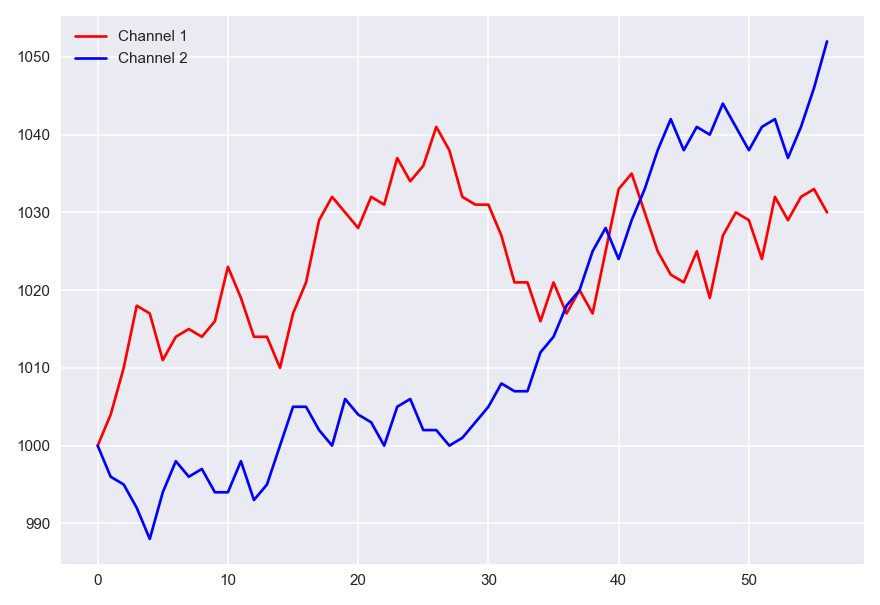

In [14]:
fig = plt.gcf()
animation = FuncAnimation(fig, animated_lineplot, interval=100)
